## TO DO.

* Renombrar columna 'day' por 'day_of_week'
* Guardar archivos después de hacer modificaciones tipo to_datetime (performance issues)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ¿Tenemos datos no válidos?

In [37]:
def shape_and_null_values(file):
    print("str(file) shape: " + str(file.shape))
    print("Is null any?")
    print(str(file.isnull().any()))

In [38]:
trips = pd.read_csv('trip.csv')
shape_and_null_values(trips)

str(file) shape: (669959, 11)
Is null any?
id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool


Se observa que en los códigos postales tenemos valores incompletos, no considero que sea un dato faltante clave para la realización del TP

In [39]:
stations = pd.read_csv('station.csv')
shape_and_null_values(stations)

str(file) shape: (70, 7)
Is null any?
id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool


In [40]:
weather = pd.read_csv('weather.csv')
shape_and_null_values(weather)

str(file) shape: (3665, 24)
Is null any?
date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False

In [41]:
#Convertir fechas a datetime

trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

# Cual es la estacion de donde salen mas viajes?

In [42]:
trips['start_station_name'].value_counts()[:5]

San Francisco Caltrain (Townsend at 4th)         49092
San Francisco Caltrain 2 (330 Townsend)          33742
Harry Bridges Plaza (Ferry Building)             32934
Embarcadero at Sansome                           27713
Temporary Transbay Terminal (Howard at Beale)    26089
Name: start_station_name, dtype: int64

# Como varia la cantidad de viajes segun el dia de la semana?

In [43]:
trips['day'] = trips['start_date'].dt.dayofweek

In [44]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
day                            int64
dtype: object

In [45]:
trips.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day
166983,401442,463,2014-08-09 13:53:00,Embarcadero at Sansome,60,2014-08-09 14:01:00,Embarcadero at Folsom,51,410,Subscriber,94133,5


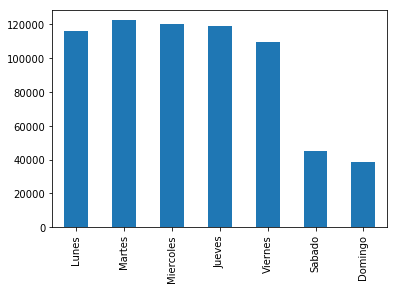

In [46]:
plt.figure()

trips_by_day_count = trips['day'].value_counts().sort_index()
trips_by_day_count.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
trips_by_day_count.plot('bar');

# Los "Customers" tienden a estar mas los fines de semana?

In [47]:
suscriptors = trips.groupby('subscription_type').agg('count')
suscriptors

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,zip_code,day
subscription_type,,,,,,,,,,,
Customer,103213,103213,103213,103213,103213,103213,103213,103213,103213,96594,103213
Subscriber,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746


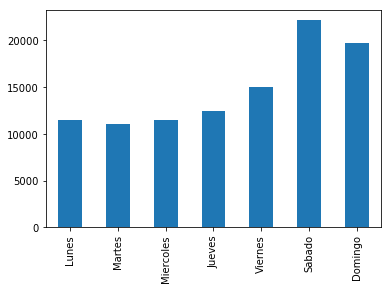

In [48]:
customers_trips_by_day = trips.loc[trips['subscription_type'] == 'Customer',['day']]['day'].value_counts().sort_index()
customers_trips_by_day.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
customers_trips_by_day.plot('bar')


# En promedio, la duracion de los viajes en la semana es constante? Las personas van al trabajo en bicicleta?

In [49]:
def getNames(seriesOfNumbers):
    names = []
    days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
    
    for numDay in seriesOfNumbers:
        names.append(days[numDay])
    return names

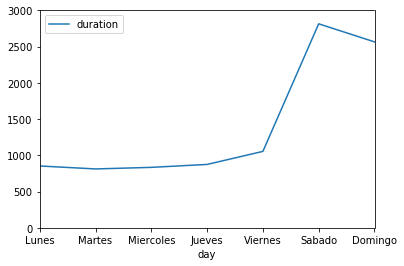

In [51]:
tripsByDayAndDuration = trips.loc[:,['day','duration']].sort_values('day')
tripsByDayAndDuration = tripsByDayAndDuration.groupby('day').mean().reset_index()
tripsByDayAndDuration['day'] = tripsByDayAndDuration[['day']].apply(lambda dates: getNames(dates))
tripsByDayAndDuration.plot('day','duration',ylim=(0,3000))         

In [ ]:
# en la semana la duracion deberia ser constante, si se concidera que las personas van al trabajo/colegio en bicicleta
# si se filtran los "costumers" dejando los suscriptos...

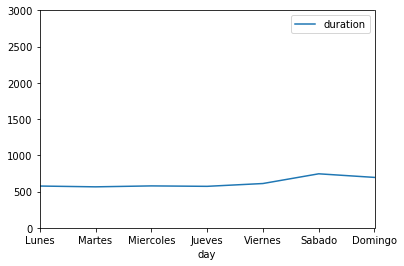

In [52]:
subscriptors_trips = trips.loc[trips.subscription_type == 'Subscriber',['day','duration']]
subscriptors_trips = subscriptors_trips.groupby('day').mean().reset_index()
subscriptors_trips['day'] = subscriptors_trips[['day']].apply(lambda dates: getNames(dates))
subscriptors_trips.plot('day','duration',ylim=(0,3000))

# Como varían los viajes en función de la hora?

In [ ]:
trips['start_time'] = trips.start_date.dt.time
trips['start_date'] = trips.start_date.dt.date

In [59]:
trips['end_time'] = trips.end_date.dt.time
trips['end_date'] = trips.end_date.dt.date
trips.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day,start_time,end_time
108181,150309,868,2014-01-12,Grant Avenue at Columbus Avenue,73,2014-01-12,Powell Street BART,39,426,Customer,78705,6,00:15:00,00:29:00
